In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from features import PolynomialFeatures
from regressions import LinearRegression, BayesianLinearRegression

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.random.uniform(0.1, 0.9, size=sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

In [3]:
x_train, y_train = create_toy_data(func, 20, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

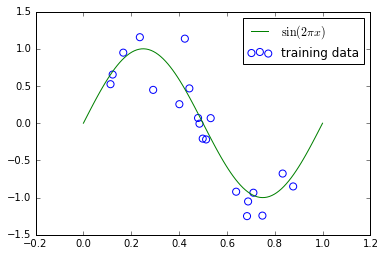

In [4]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()

In [5]:
feature = PolynomialFeatures(3)
X_train = feature.transform(x_train[:, None])
X_test = feature.transform(x_test[:, None])

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

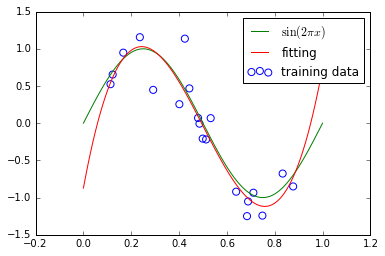

In [7]:
y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.legend()

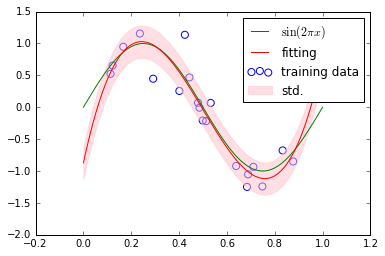

In [8]:
y, y_err = model.predict_dist(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.legend()

In [9]:
bayes_model = BayesianLinearRegression(alpha=1e-3, beta=2)
bayes_model.fit(X_train, y_train)

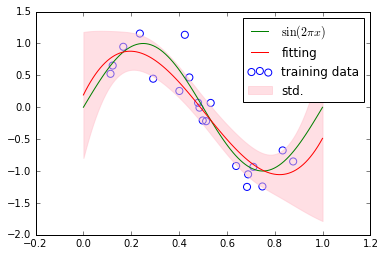

In [10]:
y, y_err = bayes_model.predict_dist(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.legend()